# Direct Oral Anticoagulant (DOAC) prescribing during COVID-19

During COVID-19, GPs have been encouraged to switch patients from Warfarin to alternative anticoagulants called Direct Oral Anticoagulants (DOACs) as they require less frequent monitoring and avoid additional visits to the GP practice. DOACs do however require renal function tests to ensure the correct dose is prescribed to avoid harm in patients. This evaluation wants to identify the proportion of patients who are at risk of harm whilst prescribed the incorrect dose of DOAC.

Data for this report has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately 18.6m Jan-18, rising to approximately 19.7m Dec-21.

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%y')

### The number and proportion of people prescribed DOACs since January 2018

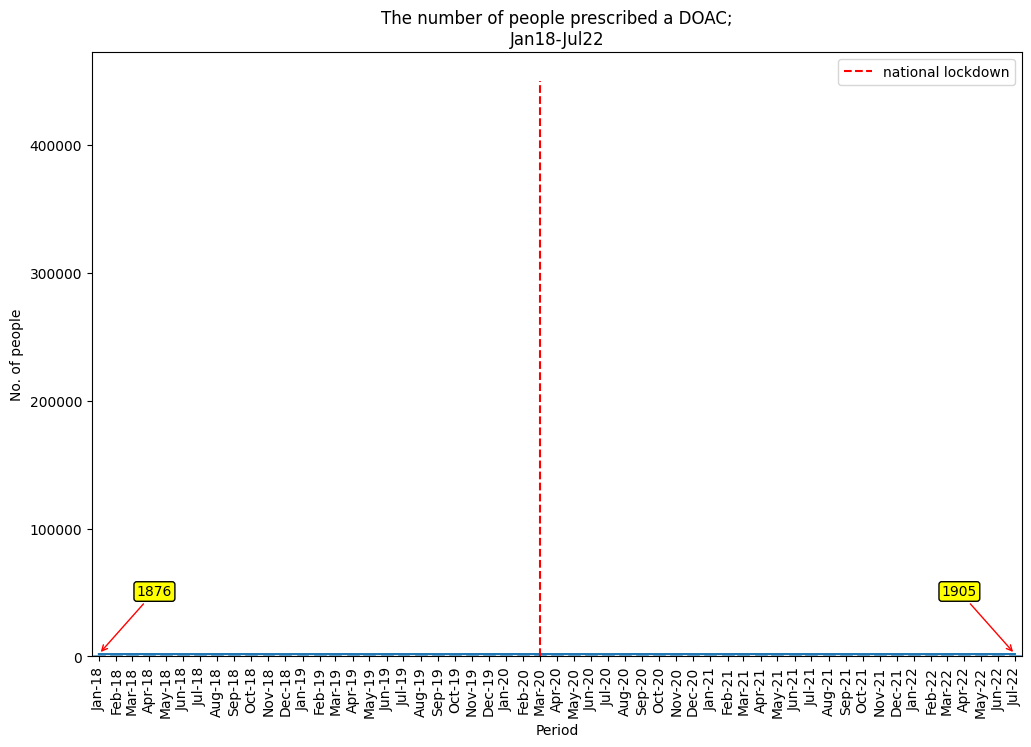

In [2]:
all_df=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "on_doac", "population"], parse_dates=["date"])
summary_df=all_df.groupby(["date"], as_index=False)["on_doac"].sum()
x1_coordinates=summary_df["date"]
y1_coordinates=summary_df["on_doac"]
plt.figure(figsize=(12,8), dpi=100)
plt.bar(x1_coordinates, y1_coordinates, edgecolor='white',width=25)
plt.plot(x1_coordinates, y1_coordinates)
plt.ylabel('No. of people')
plt.xlabel('Period')
title = 'The number of people prescribed a DOAC; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=450000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.margins(x=0)
plt.legend()
plt.savefig(f'../output/filtered/plot_01_all_doacs_absolute.png', bbox_inches='tight', dpi=100)

plt.annotate(y1_coordinates.iloc[0], xy=(x1_coordinates.iloc[0], y1_coordinates.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(y1_coordinates.iloc[-1], xy=(x1_coordinates.iloc[-1], y1_coordinates.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))

plt.show()

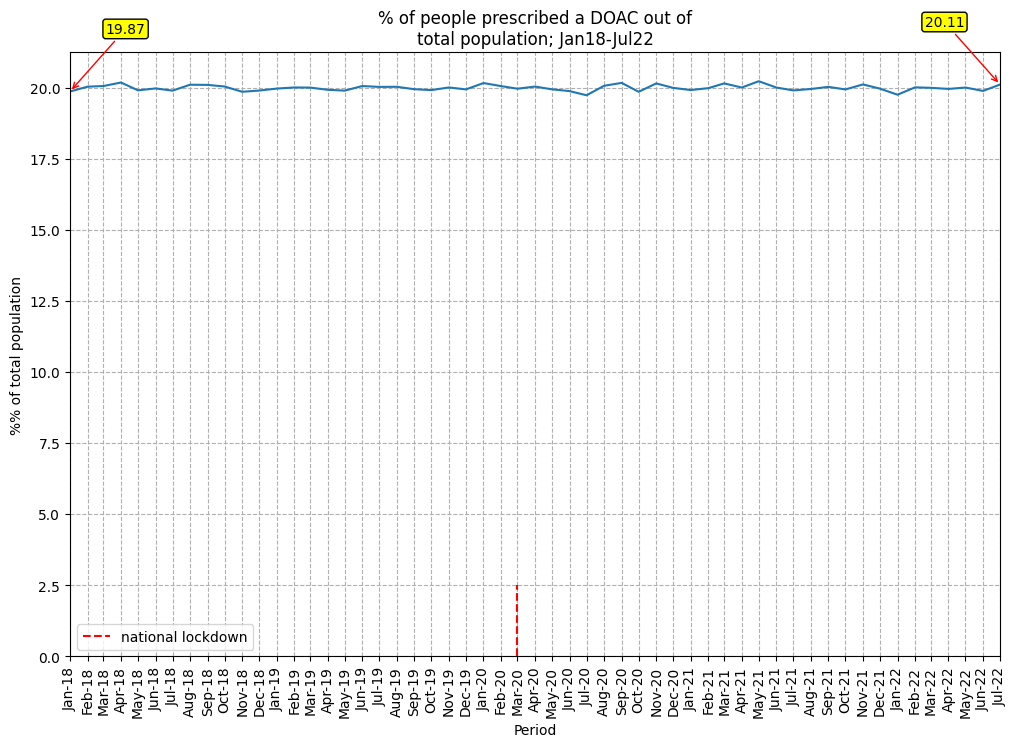

In [3]:
all_trend=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "on_doac", "value", "population"], parse_dates=["date"])
all_trend['value'] = 100 * all_trend['value']
summary_trend=all_trend.groupby(["date"], as_index=False)["value"].mean()
x1_coordinates=summary_trend["date"]
y1_coordinates=summary_trend["value"]
plt.figure(figsize=(12,8), dpi=100)
plt.plot(x1_coordinates, y1_coordinates)
plt.ylabel('%% of total population')
plt.xlabel('Period')
title = '% of people prescribed a DOAC out of total population; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=2.5,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.margins(x=0)
plt.grid(linestyle="dashed")
plt.legend()

plt.annotate(f"{y1_coordinates.iloc[0]:.2f}", xy=(x1_coordinates.iloc[0], y1_coordinates.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{y1_coordinates.iloc[-1]:.2f}", xy=(x1_coordinates.iloc[-1], y1_coordinates.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))

plt.savefig(f'../output/filtered/plot_02_all_doacs_proportion.png', bbox_inches='tight', dpi=100)
plt.show()

### The change in prescribing behaviour related to DOACs since January 2018 broken down by patient demographics 

#### 1. Number of people (absolute & normalised) prescribed a DOAC by region

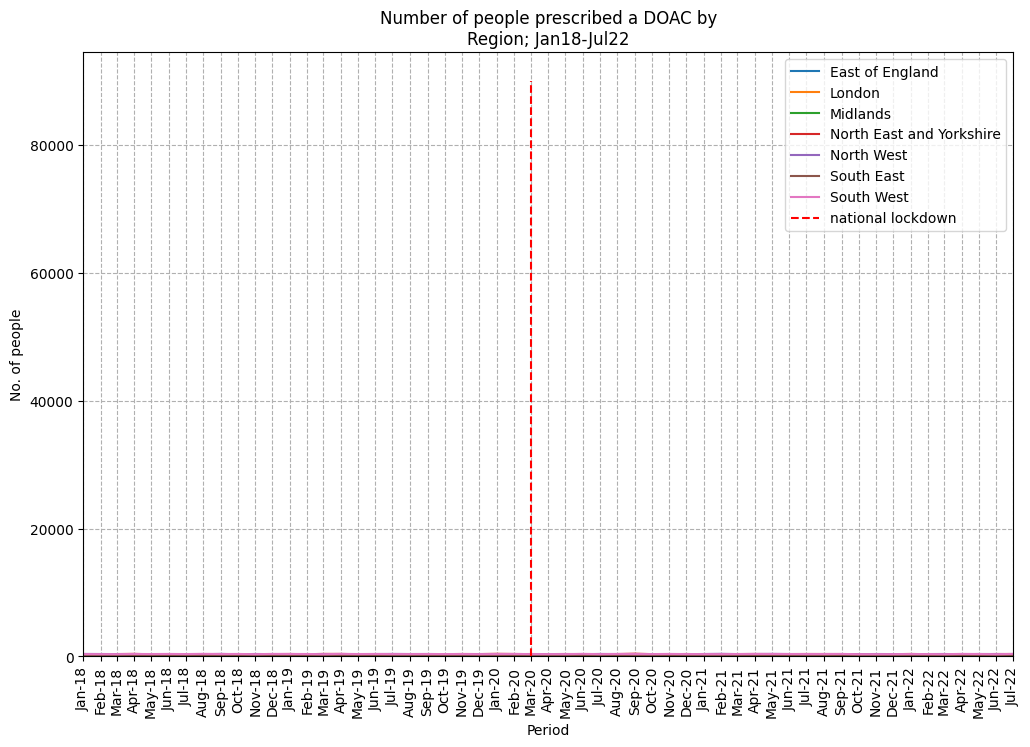

In [4]:
region_line=pd.read_csv("../output/filtered/measure_doacs_by_region_rate.csv", usecols=["date", "region", "on_doac", "population"], parse_dates=["date"])
region_subset2=region_line.loc[region_line["region"].notnull(), :]
pivot_region2=region_subset2.pivot(index='date', columns='region', values='on_doac')
plt.figure(figsize=(12,8), dpi=100)
for c in pivot_region2.columns:
    plt.plot(pivot_region2[c], label=c)
plt.ylabel('No. of people')
plt.xlabel('Period')
title = 'Number of people prescribed a DOAC by Region; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=90000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.legend()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)



plt.savefig(f'../output/filtered/plot_03_all_doacs_by_region_absolute.png', bbox_inches='tight', dpi=100)

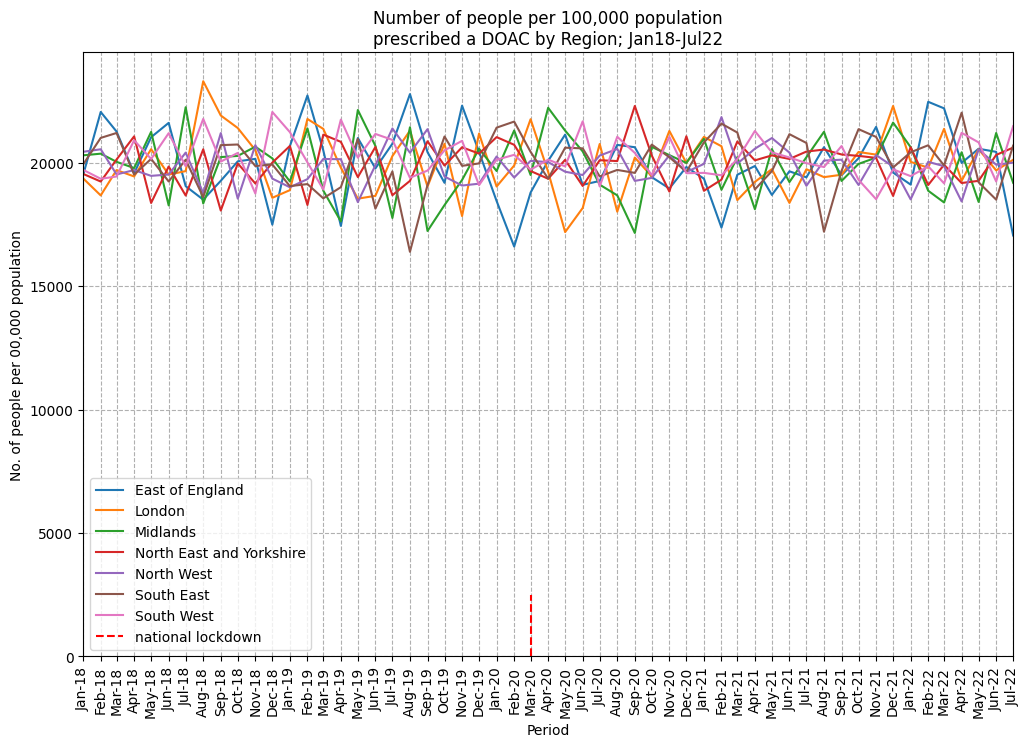

In [5]:
region_trend=pd.read_csv("../output/filtered/measure_doacs_by_region_rate.csv", usecols=["date", "region", "on_doac", "population"], parse_dates=["date"])
region_trend['on_doac'] = (region_trend['on_doac'] / region_trend['population'] * 100000)
region_subset3=region_trend.loc[region_trend["region"].notnull(), :]
pivot_region3=region_subset3.pivot(index='date', columns='region', values='on_doac')
plt.figure(figsize=(12,8), dpi=100)
for c in pivot_region3.columns:
    plt.plot(pivot_region3[c], label=c)
plt.ylabel('No. of people per 00,000 population')
plt.xlabel('Period')
title = 'Number of people per 100,000 population prescribed a DOAC by Region; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=2500,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.legend()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_04_all_doacs_by_region_normalised.png', bbox_inches='tight', dpi=100)
plt.show()

#### 2. Number of people (absolute & normalised) prescribed a DOAC by age band - excludes patients with a missing age

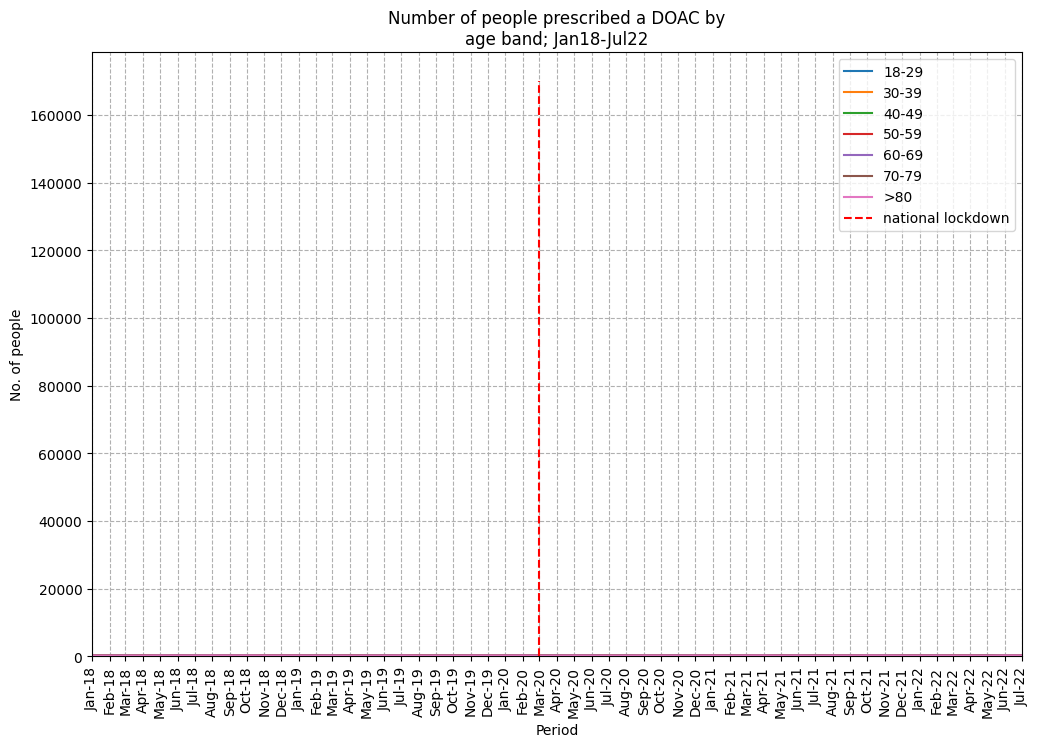

In [6]:
age_line=pd.read_csv("../output/filtered/measure_doacs_by_age_band_rate.csv", usecols=["date", "age_band", "on_doac", "population"], parse_dates=["date"])
age_subset2=age_line.loc[age_line["age_band"] != "missing", :]
pivot_age2=age_subset2.pivot(index='date', columns='age_band', values='on_doac')
plt.figure(figsize=(12,8), dpi=100)
for c in pivot_age2.columns:
    plt.plot(pivot_age2[c], label=c)
plt.ylabel('No. of people')
plt.xlabel('Period')
title = 'Number of people prescribed a DOAC by age band; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=170000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.legend()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_05_all_doacs_by_age_band_absolute.png', bbox_inches='tight', dpi=100)
plt.show()

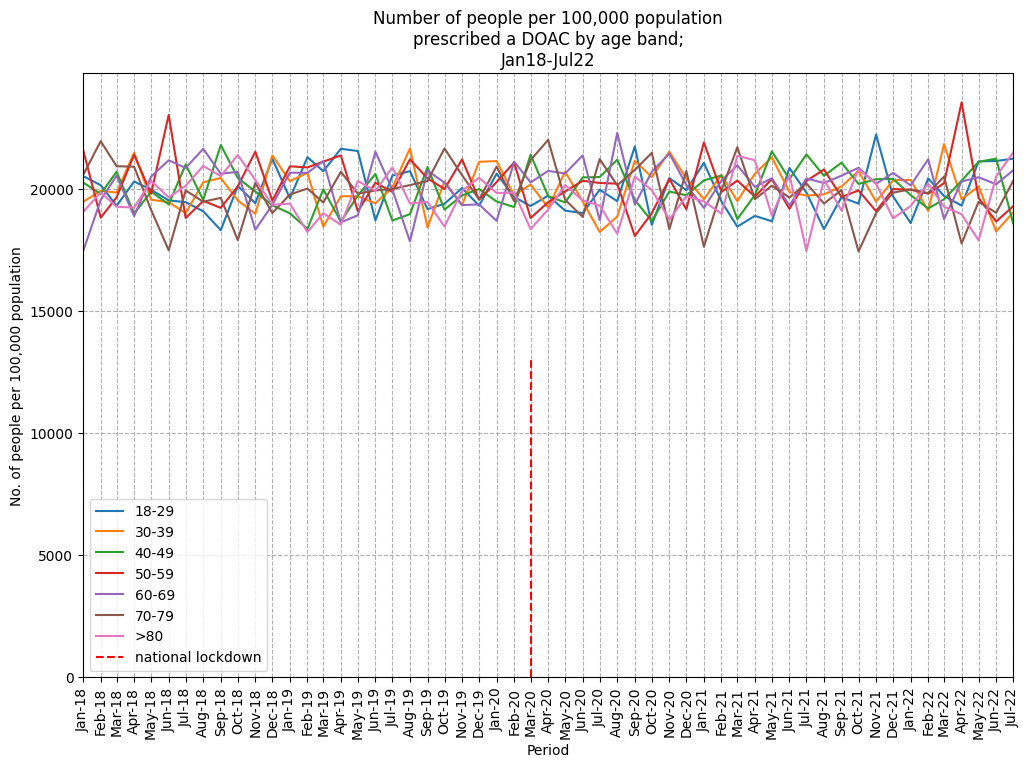

In [7]:
age_trend=pd.read_csv("../output/filtered/measure_doacs_by_age_band_rate.csv", usecols=["date", "age_band", "on_doac", "population"], parse_dates=["date"])
age_trend['on_doac'] = (age_trend['on_doac'] / age_trend['population'] * 100000)
age_subset3=age_trend.loc[age_trend["age_band"] != "missing", :]
pivot_age3=age_subset3.pivot(index='date', columns='age_band', values='on_doac')
plt.figure(figsize=(12,8), dpi=100)

for c in pivot_age3.columns:
    plt.plot(pivot_age3[c], label=c)
    
plt.ylabel('No. of people per 100,000 population')
plt.xlabel('Period')
title = 'Number of people per 100,000 population prescribed a DOAC by age band; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=13000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.legend()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.savefig(f'../output/filtered/plot_06_all_doacs_by_age_band_normalised.png', bbox_inches='tight', dpi=100)
plt.show()

#### 3. Number of people (absolute & normalised) prescribed a DOAC by sex

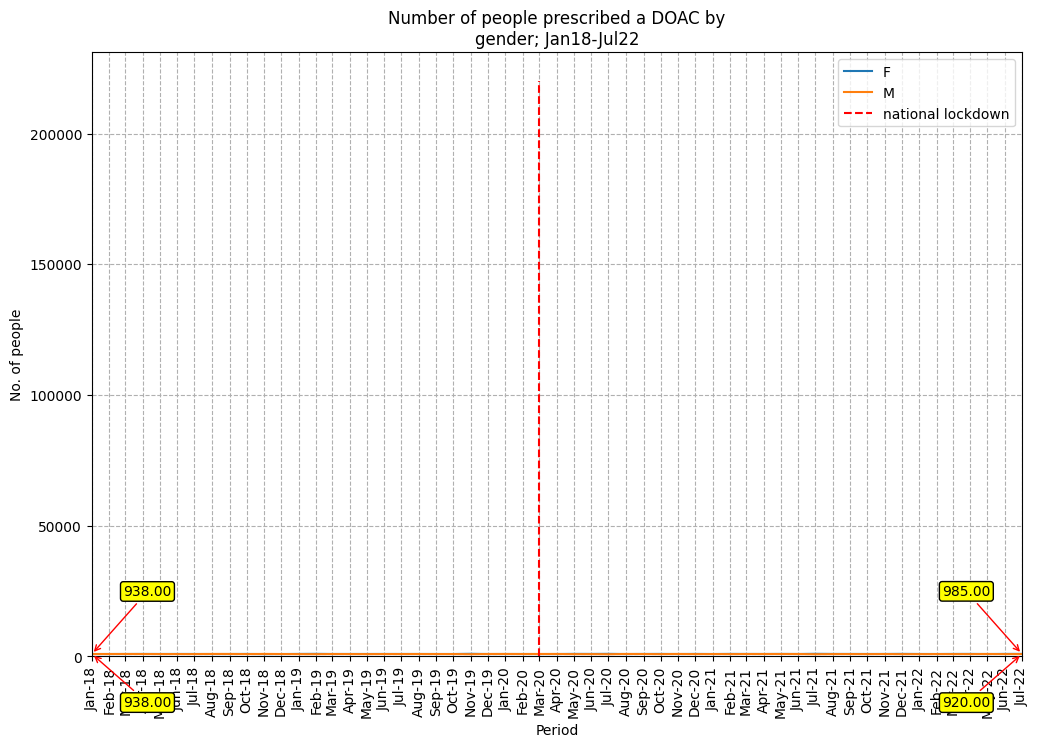

In [8]:
sex_line=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "sex", "on_doac", "population"], parse_dates=["date"])
sex_subset2=sex_line.loc[sex_line["sex"].isin(["F", "M"])]
pivot_sex2=sex_subset2.pivot(index='date', columns='sex', values='on_doac')
plt.figure(figsize=(12,8), dpi=100)


for c in pivot_sex2.columns:
    plt.plot(pivot_sex2[c], label=c)
    
plt.ylabel('No. of people')
plt.xlabel('Period')
title = 'Number of people prescribed a DOAC by gender; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=220000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.legend()
plt.grid(linestyle='dashed')
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.xticks(rotation=90)


plt.annotate(f"{pivot_sex2.iloc[0, 0]:.2f}", xy=(pivot_sex2.index[0], pivot_sex2.iloc[0, 0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{pivot_sex2.iloc[-1, 0]:.2f}", xy=(pivot_sex2.index[-1], pivot_sex2.iloc[-1, 0]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))

plt.annotate(f"{pivot_sex2.iloc[0, 1]:.2f}", xy=(pivot_sex2.index[0], pivot_sex2.iloc[0, 1]), xytext=(40,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{pivot_sex2.iloc[-1, 1]:.2f}", xy=(pivot_sex2.index[-1], pivot_sex2.iloc[-1, 1]), xytext=(-40,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))


plt.savefig(f'../output/filtered/plot_07_all_doacs_by_sex_absolute.png', bbox_inches='tight', dpi=100)
plt.show() 

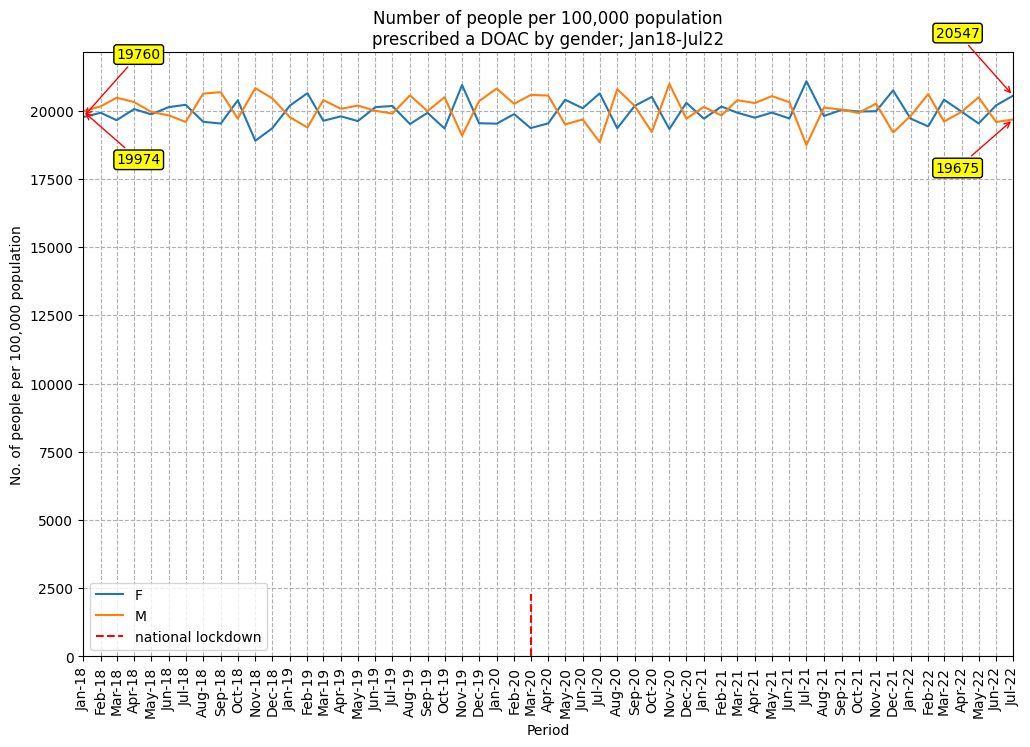

In [9]:
sex_trend=pd.read_csv("../output/filtered/measure_doacs_by_sex_rate.csv", usecols=["date", "sex", "on_doac", "population"], parse_dates=["date"])
sex_trend['on_doac'] = (sex_trend['on_doac'] / sex_trend['population'] * 100000)
sex_subset3=sex_trend.loc[sex_trend["sex"].isin(["F", "M"])]
pivot_sex3=sex_subset3.pivot(index='date', columns='sex', values='on_doac')
plt.figure(figsize=(12,8), dpi=100)

for c in pivot_sex3.columns:
    plt.plot(pivot_sex3[c], label=c)
    
plt.ylabel('No. of people per 100,000 population')
plt.xlabel('Period')
title = 'Number of people per 100,000 population prescribed a DOAC by gender; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=2300,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.legend()
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)


plt.annotate(f"{pivot_sex3.iloc[0, 0]:.0f}", xy=(pivot_sex3.index[0], pivot_sex3.iloc[0, 0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{pivot_sex3.iloc[-1, 0]:.0f}", xy=(pivot_sex3.index[-1], pivot_sex3.iloc[-1, 0]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))

plt.annotate(f"{pivot_sex3.iloc[0, 1]:.0f}", xy=(pivot_sex3.index[0], pivot_sex3.iloc[0, 1]), xytext=(40,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{pivot_sex3.iloc[-1, 1]:.0f}", xy=(pivot_sex3.index[-1], pivot_sex3.iloc[-1, 1]), xytext=(-40,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))


plt.savefig(f'../output/filtered/plot_08_all_doacs_by_sex_normalised.png', bbox_inches='tight', dpi=100)
plt.show()

#### 4. Mean age by sex

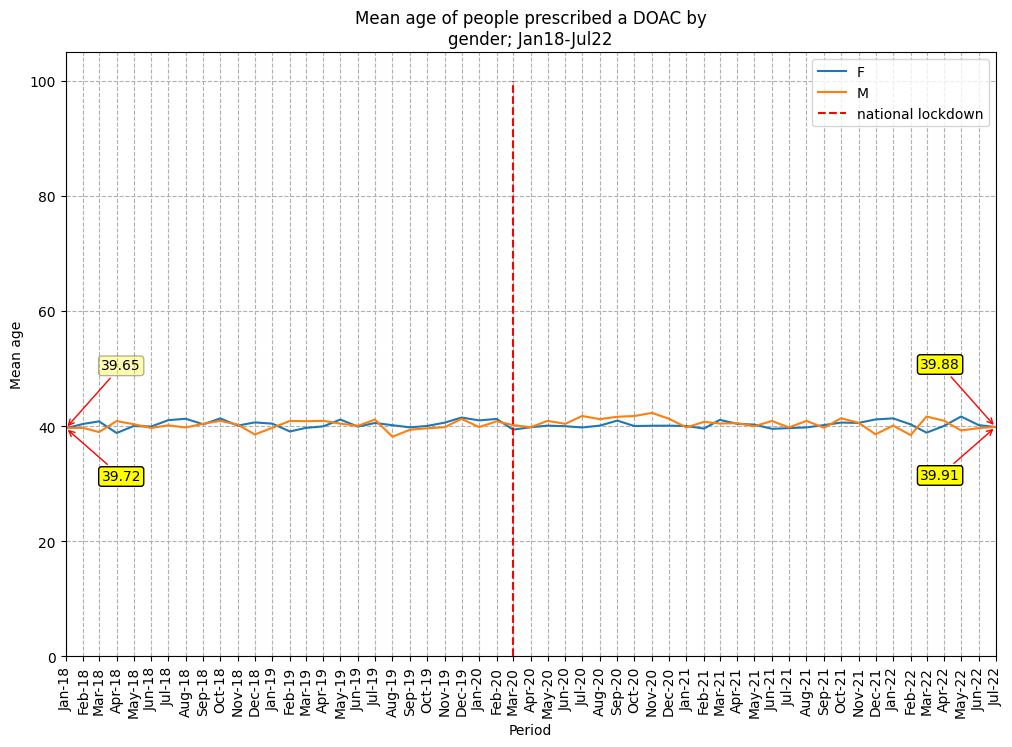

In [10]:
sexage_df=pd.read_csv("../output/filtered/measure_doacs_by_sex_and_age_rate.csv", usecols=["date", "age", "sex", "on_doac"], parse_dates=["date"])
sexage_df["age_doac"] = (sexage_df["age"] * sexage_df["on_doac"])
female_subset=sexage_df.loc[sexage_df["sex"] == "F", :]
female_df=female_subset.groupby(["date"], as_index=False)[["age_doac", "on_doac"]].sum()
female_df["femaleage"] = female_df["age_doac"] / female_df["on_doac"]

male_subset=sexage_df.loc[sexage_df["sex"] == "M", :]
male_df=male_subset.groupby(["date"], as_index=False)[["age_doac", "on_doac"]].sum()
male_df["maleage"] = male_df["age_doac"] / male_df["on_doac"]

x1_coordinates=female_df["date"]
y1_coordinates=female_df["femaleage"]
x2_coordinates=male_df["date"]
y2_coordinates=male_df["maleage"]
plt.figure(figsize=(12,8), dpi=100)
plt.plot(x1_coordinates, y1_coordinates, label='F')
plt.plot(x2_coordinates, y2_coordinates, label='M')
plt.ylabel('Mean age')
plt.xlabel('Period')
title = 'Mean age of people prescribed a DOAC by gender; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.legend()

plt.annotate(f"{y1_coordinates.iloc[0]:.2f}", xy=(x1_coordinates.iloc[0], y1_coordinates.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{y1_coordinates.iloc[-1]:.2f}", xy=(x1_coordinates.iloc[-1], y1_coordinates.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))

plt.annotate(f"{y2_coordinates.iloc[0]:.2f}", xy=(x2_coordinates.iloc[0], y2_coordinates.iloc[0]), xytext=(40,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{y2_coordinates.iloc[-1]:.2f}", xy=(x2_coordinates.iloc[-1], y2_coordinates.iloc[-1]), xytext=(-40,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))


plt.savefig(f'../output/filtered/plot_09_mean_age_by_sex.png', bbox_inches='tight', dpi=100)
plt.show()


#### 5. Proportion (%) of people on a DOAC identified as being a 'caregiver'

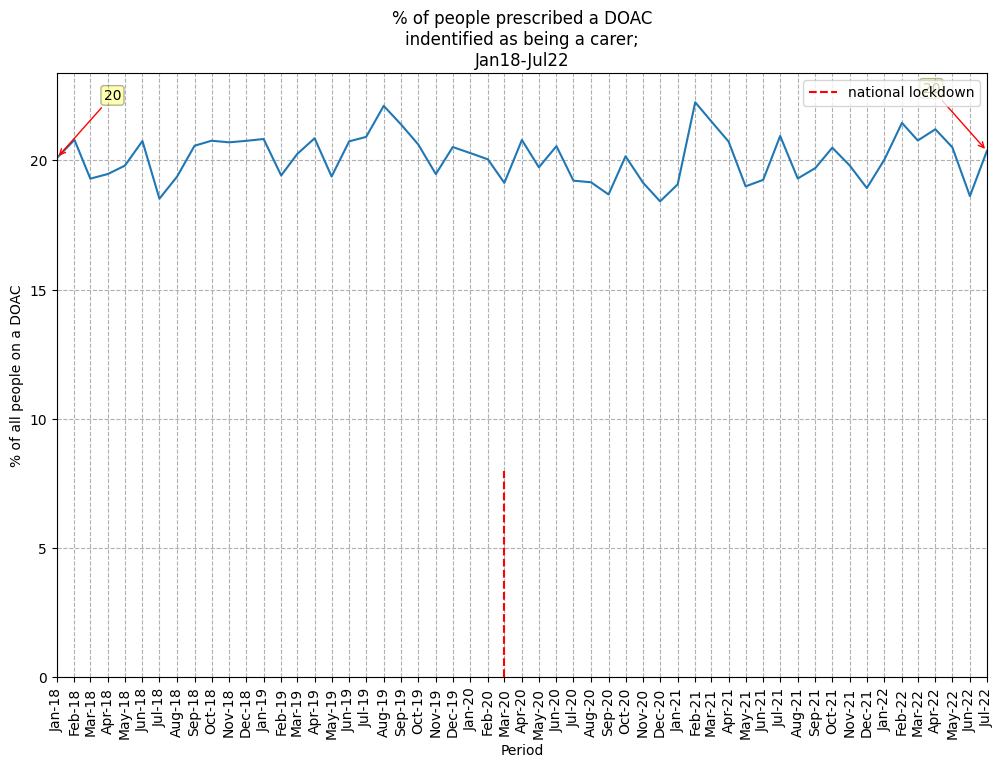

In [11]:
carer_df=pd.read_csv("../output/filtered/measure_doacs_by_carer_rate.csv", usecols=["date", "carer", "on_doac", "value"], parse_dates=["date"])
carer_df['value'] = 100 * carer_df['value']
carer_subset=carer_df.loc[(carer_df["on_doac"] != 0), :]
pivot_carer = carer_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8), dpi=100)
plt.plot(pivot_carer)
plt.ylabel('% of all people on a DOAC')
plt.xlabel('Period')
title = '% of people prescribed a DOAC indentified as being a carer; Jan18-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime("2020-03-01")],
        ymin=0,
        ymax=8,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xlim(xmin="2018-01-01", xmax="2022-07-01")
plt.ylim(ymin=0)
plt.grid(linestyle='dashed')
plt.xticks(rotation=90)
plt.legend()


plt.annotate(f"{pivot_carer.iloc[0, 0]:.0f}", xy=(pivot_carer.index[0], pivot_carer.iloc[0, 0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))

plt.annotate(f"{pivot_carer.iloc[-1, 0]:.0f}", xy=(pivot_carer.index[-1], pivot_carer.iloc[-1, 0]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))


plt.savefig(f'../output/filtered/plot_10_proportion_recorded_as_carer.png', bbox_inches='tight', dpi=100)
plt.show() 

### The proportion (%) of people on a DOAC who have a specific event recorded in the last 12 months

#### a. Proportion of people prescribed a DOAC with a weight recorded in the last 12 months

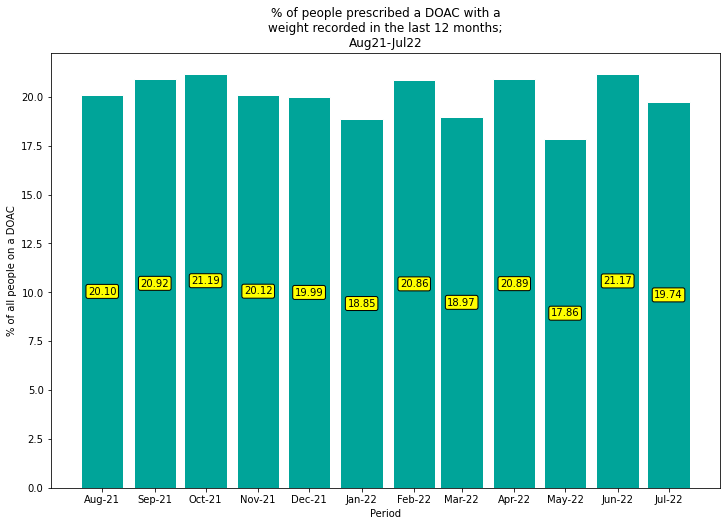

In [12]:
weight_df=pd.read_csv("../output/filtered/measure_doacs_with_weight_recorded_rate.csv", usecols=["date", "weight_recorded", "on_doac", "value"], parse_dates=["date"])
weight_df['value'] = 100 * weight_df['value']
weight_subset=weight_df.loc[(weight_df["on_doac"] != 0) & (weight_df["date"] >= '2021-08-01'), :]
pivot_weight = weight_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8))
plt.bar(pivot_weight.index, pivot_weight.iloc[:,0], color=('#00A499'), edgecolor='white', width=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.ylabel('% of all people on a DOAC')
plt.xlabel('Period')
title = '% of people prescribed a DOAC with a weight recorded in the last 12 months; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0)
plt.gca()

for i in range(len(pivot_weight)):

    plt.annotate(f"{pivot_weight.iloc[i, 0]:.2f}", xy=(pivot_weight.index[i], pivot_weight.iloc[i, 0]/2), xytext=(0,0), 
                textcoords='offset points', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                )

plt.savefig(f'../output/filtered/plot_11_proportion_with_weight_recorded.png', bbox_inches='tight', dpi=100)
plt.show() 

#### b. The proportion (%) of people prescribed a DOAC with an eGFR recorded in the last 12 months

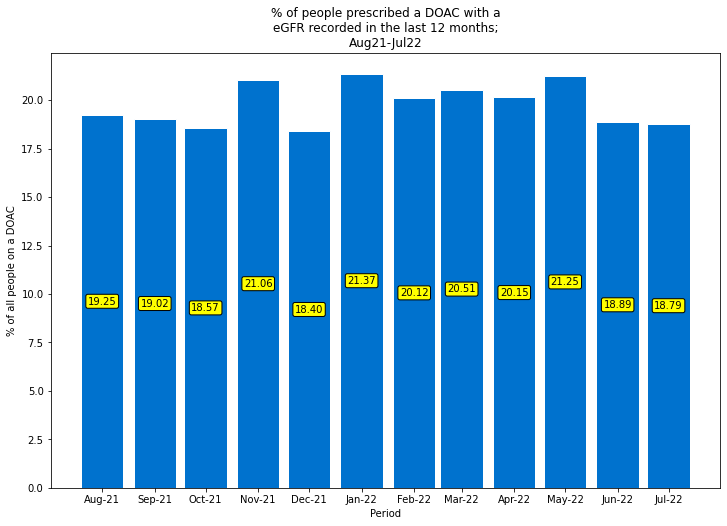

In [13]:
egfr_df=pd.read_csv("../output/filtered/measure_doacs_with_egfr_recorded_rate.csv", usecols=["date", "egfr_recorded", "on_doac", "population", "value"], parse_dates=["date"])
egfr_df['value'] = 100 * egfr_df['value']
egfr_subset=egfr_df.loc[(egfr_df["on_doac"] != 0) & (egfr_df["date"] >= '2021-08-01'), :]
pivot_egfr = egfr_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8))
plt.bar(pivot_egfr.index, pivot_egfr.iloc[:,0], color=('#0072CE'), edgecolor='white', width=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.ylabel('% of all people on a DOAC')
plt.xlabel('Period')
title = '% of people prescribed a DOAC with a eGFR recorded in the last 12 months; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0)

for i in range(len(pivot_egfr)):

    plt.annotate(f"{pivot_egfr.iloc[i, 0]:.2f}", xy=(pivot_egfr.index[i], pivot_egfr.iloc[i, 0]/2), xytext=(0,0), 
                textcoords='offset points', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                )


plt.gca()
plt.savefig(f'../output/filtered/plot_12_proportion_with_egfr_recorded.png', bbox_inches='tight', dpi=100)

#### c. The proportion (%) of people prescribed a DOAC with serum creatinine recorded in the last 12 months

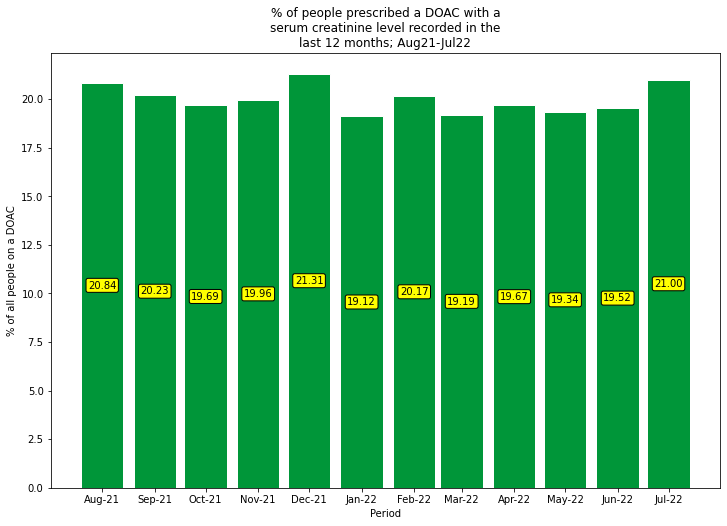

In [14]:
sc_df=pd.read_csv("../output/filtered/measure_doacs_with_serumcreatinine_recorded_rate.csv", usecols=["date", "serumcreatinine_recorded", "on_doac", "population", "value"], parse_dates=["date"])
sc_df['value'] = 100 * sc_df['value']
sc_subset=sc_df.loc[(sc_df["on_doac"] != 0) & (sc_df["date"] >= '2021-08-01'), :]
pivot_sc = sc_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8))
plt.bar(pivot_sc.index, pivot_sc.iloc[:, 0], color=('#009639'), edgecolor='white', width=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.ylabel('% of all people on a DOAC')
plt.xlabel('Period')
title = '% of people prescribed a DOAC with a serum creatinine level recorded in the last 12 months; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0)
plt.gca()

for i in range(len(pivot_sc)):

    plt.annotate(f"{pivot_sc.iloc[i, 0]:.2f}", xy=(pivot_sc.index[i], pivot_sc.iloc[i, 0]/2), xytext=(0,0), 
                textcoords='offset points', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                )

plt.savefig(f'../output/filtered/plot_13_proportion_with_serumcreatinine_recorded.png', bbox_inches='tight', dpi=100)

#### d. The proportion (%) of people prescribed a DOAC with creatinine clearance (Cr/Cl) recorded in the last 12 months

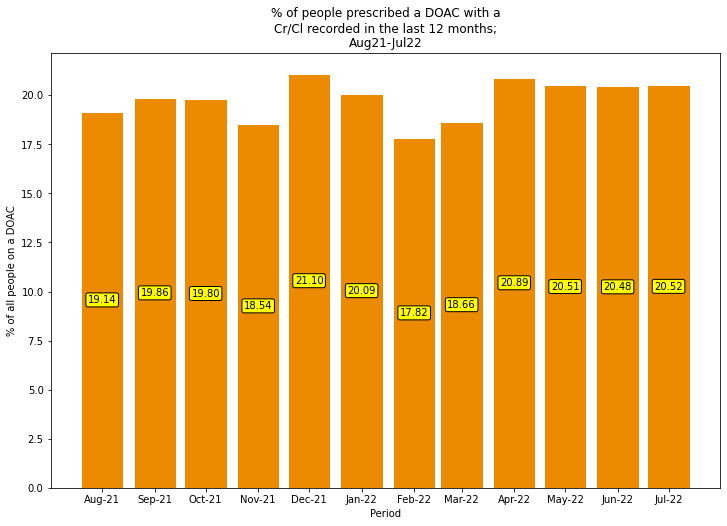

In [15]:
crcl_df=pd.read_csv("../output/filtered/measure_doacs_with_crcl_recorded_rate.csv", usecols=["date", "crcl_recorded", "on_doac", "population", "value"], parse_dates=["date"])
crcl_df['value'] = 100 * crcl_df['value']
crcl_subset=crcl_df.loc[(crcl_df["on_doac"] != 0) & (crcl_df["date"] >= '2021-08-01'), :]
pivot_crcl = crcl_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8))
plt.bar(pivot_crcl.index, pivot_crcl.iloc[:,0], color=('#ED8B00'), edgecolor='white', width=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)

plt.ylabel('% of all people on a DOAC')
plt.xlabel('Period')
title = '% of people prescribed a DOAC with a Cr/Cl recorded in the last 12 months; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0)
plt.gca()

for i in range(len(pivot_crcl)):

    plt.annotate(f"{pivot_crcl.iloc[i, 0]:.2f}", xy=(pivot_crcl.index[i], pivot_crcl.iloc[i, 0]/2), xytext=(0,0), 
                textcoords='offset points', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                )

plt.savefig(f'../output/filtered/plot_14_proportion_with_crcl_recorded.png', bbox_inches='tight', dpi=100)

#### e. The proportion (%) of people prescribed a DOAC with serum creatinine recorded in the last 12 months but no creatinine clearance (Cr/Cl)

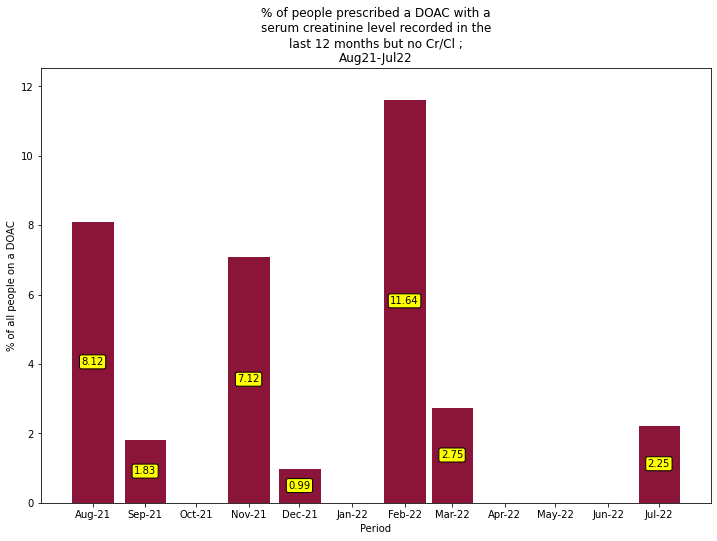

In [16]:
crcl2_df=pd.read_csv("../output/filtered/measure_doacs_with_serumcreatinine_and_crcl_recorded_rate.csv", usecols=["date", "crcl_recorded", "on_doac", "serumcreatinine_recorded", "value"], parse_dates=["date"])
crcl2_df['value'] = 100 - (100 * crcl2_df['value'])
crcl2_subset=crcl2_df.loc[(crcl2_df["on_doac"] != 0) & (crcl2_df["date"] >= '2021-08-01'), :]
pivot_crcl2 = crcl2_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8))
plt.bar(pivot_crcl2.index, pivot_crcl2.iloc[:, 0], color=('#8A1538'), edgecolor='white', width=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)

plt.ylabel('% of all people on a DOAC')
plt.xlabel('Period')
title = '% of people prescribed a DOAC with a serum creatinine level recorded in the last 12 months but no Cr/Cl ; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0)
plt.gca()

for i in range(len(pivot_crcl2)):
  
    plt.annotate(f"{pivot_crcl2.iloc[i, 0]:.2f}", xy=(pivot_crcl2.index[i], pivot_crcl2.iloc[i, 0]/2), xytext=(0,0), 
                textcoords='offset points', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                )
plt.savefig(f'../output/filtered/plot_15_proportion_with_serumcreatinine_and_crcl_recorded.png', bbox_inches='tight', dpi=100)

### Reviewing DOACs in patients with Non-Valvular Atrial Fibrillation in the latest 12 months

#### i. The proportion (%) of people prescribed a DOAC with Non-Valvular Atrial Fibrillation

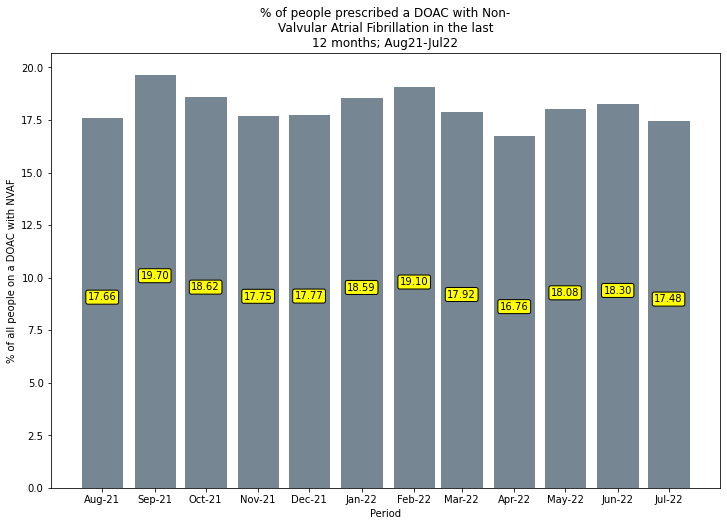

In [17]:
af_df=pd.read_csv("../output/filtered/measure_doacs_with_af_recorded_rate.csv", usecols=["date", "atrial_fib", "on_doac", "population", "value"], parse_dates=["date"])
af_df['value'] = 100 * af_df['value']
af_subset=af_df.loc[(af_df["on_doac"] != 0) & (af_df["date"] >= '2021-08-01'), :]
pivot_af = af_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8))
plt.bar(pivot_af.index, pivot_af.iloc[:, 0], color=('#768692'), edgecolor='white', width=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)

plt.ylabel('% of all people on a DOAC with NVAF')
plt.xlabel('Period')
title = '% of people prescribed a DOAC with Non-Valvular Atrial Fibrillation in the last 12 months; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0)
plt.gca()

for i in range(len(pivot_af)):
  
    plt.annotate(f"{pivot_af.iloc[i, 0]:.2f}", xy=(pivot_af.index[i], pivot_af.iloc[i, 0]/2), xytext=(0,0), 
                textcoords='offset points', ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                )

plt.savefig(f'../output/filtered/plot_16_proportion_with_af_recorded.png', bbox_inches='tight', dpi=100)

#### ii. The proportion (%) of people prescribed a DOAC with Non-Valvular Atrial Fibrillation and with Cr/Cl recorded in the last 12 months

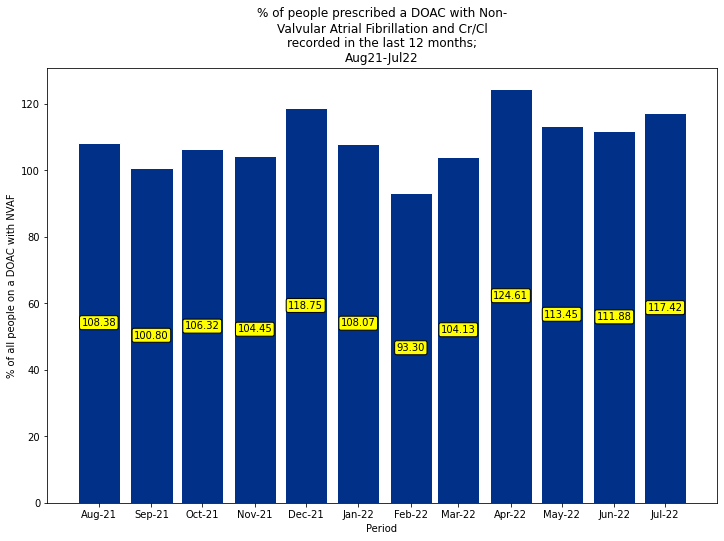

In [18]:
af_crcl=pd.read_csv("../output/filtered/measure_doacs_with_af_and_crcl_recorded_rate.csv", usecols=["date", "crcl_recorded", "on_doac", "atrial_fib", "value"], parse_dates=["date"])
af_crcl['value'] = (100 * af_crcl['value'])
afcrcl_subset=af_crcl.loc[(af_crcl["on_doac"] != 0) & (af_crcl["date"] >= '2021-08-01'), :]
pivot_afcrcl = afcrcl_subset.pivot(index='date', columns='on_doac', values='value')
plt.figure(figsize=(12,8))

plt.bar(pivot_afcrcl.index, pivot_afcrcl.iloc[:, 0], color=('#003087'), edgecolor='white', width=25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.ylabel('% of all people on a DOAC with NVAF')
plt.xlabel('Period')
title = '% of people prescribed a DOAC with Non-Valvular Atrial Fibrillation and Cr/Cl recorded in the last 12 months; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0)
plt.gca()

for i in range(len(pivot_afcrcl)):
  
    plt.annotate(f"{pivot_afcrcl.iloc[i, 0]:.2f}", xy=(pivot_afcrcl.index[i], pivot_afcrcl.iloc[i, 0]/2), xytext=(0,0), 
                textcoords='offset points', ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                )
plt.savefig(f'../output/filtered/plot_17_proportion_with_af_and_crcl_recorded.png', bbox_inches='tight', dpi=100)

#### iii. The proportion (%) of people prescribed a DOAC with Non-Valvular Atrial Fibrillation and with Cr/Cl recorded in the last 12 months, where the recommended DOAC dose (calculated using recorded Cr/Cl) does not match prescribed DOAC dose.
https://cks.nice.org.uk/topics/anticoagulation-oral/

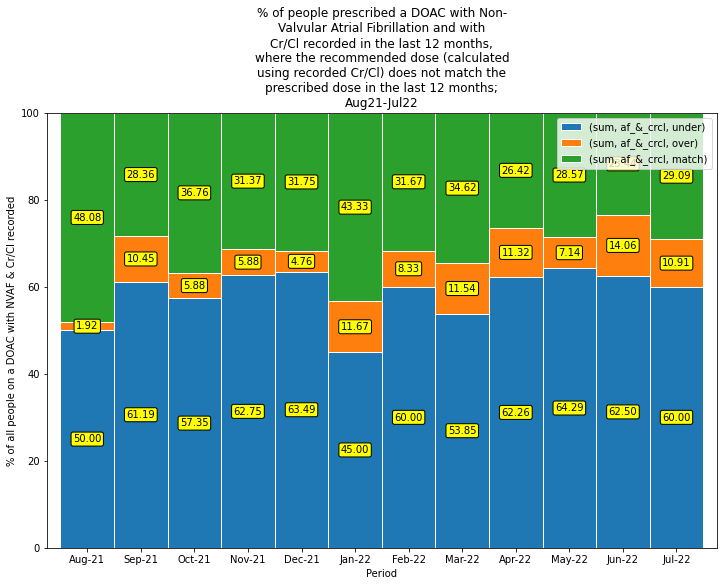

In [19]:
af_evaluate=pd.read_csv("../output/filtered/measure_dose_evaluation_rate.csv", usecols=["date", "af_&_crcl", "dose_summary"], parse_dates=["date"])
evaluate_subset=af_evaluate.loc[(af_evaluate["dose_summary"] != "0") & (af_evaluate["date"] >= '2021-08-01'), :]
pivot_evaluate = evaluate_subset.pivot_table(index='date', columns='dose_summary', aggfunc=[np.sum], fill_value=0, margins=True, margins_name="Average of 12 months")
pivot_evaluate2 = pivot_evaluate.div( pivot_evaluate.iloc[:,-1], axis=0)
pivot_evaluate2 = pivot_evaluate2.iloc[0:-1, [2, 1, 0]]

pivot_evaluate2.index = pd.to_datetime(pivot_evaluate2.index).strftime('%b-%y')

pivot_evaluate2['sum'] = 100 * pivot_evaluate2['sum']

pivot_evaluate2.plot(kind='bar', stacked = True, edgecolor='white', figsize=(12,8), width=1, legend='')


plt.ylabel('% of all people on a DOAC with NVAF & Cr/Cl recorded')
plt.xlabel('Period')
plt.xticks(rotation=0)
plt.margins(x=0)
title = '% of people prescribed a DOAC with Non-Valvular Atrial Fibrillation and with Cr/Cl recorded in the last 12 months, where the recommended dose (calculated using recorded Cr/Cl) does not match the prescribed dose in the last 12 months; Aug21-Jul22'
plt.title('\n'.join(wrap(title,40)), fontsize=12)
plt.ylim(ymin=0, ymax=100)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

order = [0, 1, 2]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

labels = pivot_evaluate2.copy()
labels.iloc[:, 0] = pivot_evaluate2.iloc[:, 0]/2
labels.iloc[:, 1] = pivot_evaluate2.iloc[:, 0] + (pivot_evaluate2.iloc[:, 1]/2)
labels.iloc[:, 2] = pivot_evaluate2.iloc[:, 0] + pivot_evaluate2.iloc[:, 1] + (pivot_evaluate2.iloc[:, 2]/2)

for c, _ in enumerate(pivot_evaluate2.columns):
    for i in range(len(pivot_evaluate2)):
        
   

        plt.annotate(f"{(pivot_evaluate2.iloc[i, c]):.2f}", xy=(i, labels.iloc[i, c]), xytext=(0,0), 
                    textcoords='offset points', ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=1),
                    )

plt.savefig(f'../output/filtered/plot_18_dose_match.png', bbox_inches='tight', dpi=100)
plt.show()